<a href="https://colab.research.google.com/github/marianna13/Notebooks/blob/master/CNN%20Improve%20Image%20Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Better image quality with Neural Network
*This notebook presents how you can improve quality of any image using Python, Keras and OpenCV. The neural network here is trained on Cifar10 dataset that has images of different objects. Hope you will like it!*

Marianna

In [2]:
from keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, UpSampling2D, InputLayer
from keras.initializers import he_normal
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.train import AdamOptimizer
import numpy as np
import cv2

Using TensorFlow backend.


In [3]:
# load cifar10 dataset
(x_train, y_train), (_, _) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


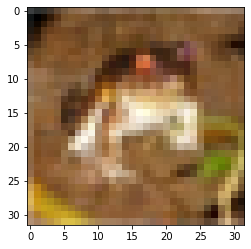

In [4]:
# let's look at on of the images in the dataset
img = x_train[0,:,:,:]
plt.imshow(img)

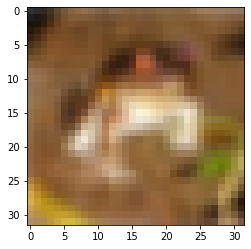

In [5]:
# lower quality of images in datsset by resizing them and expanding afterwards
Y_train = x_train.copy()
X_train = []
for i in range(x_train.shape[0]):
    X_train.append(cv2.resize(cv2.resize(x_train[i], (24,24)), (32,32)))
X_train = (np.array(X_train))

# let's look at what we have obtained
img_low = X_train[0,:,:,:]
plt.imshow(img_low)

In [0]:
# this function just scales data
def prepare(raw):
  return (raw/255.)

In [0]:
X, Y=prepare(X_train), prepare(Y_train)

# train model on 49990 of 50000 examples
x,y=X[:49990], Y[:49990]

In [8]:
# create keras model with only convolutional layers so we can use it on images with diffrent sizes
def create_model():
  model = Sequential()
  model.add(InputLayer(input_shape=(None, None, 3)))
  model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2, kernel_initializer=he_normal()))
  model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer=he_normal()))
  model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer=he_normal()))
  model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer=he_normal()))
  model.add(UpSampling2D((2, 2)))
  model.add(Conv2D(3, (3, 3), activation='tanh', padding='same', kernel_initializer=he_normal()))
  return model

model=create_model()
model.compile(optimizer=AdamOptimizer(0.001),loss='mse')
model.fit(x,y, epochs=3, batch_size=8)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 49990 samples
Epoch 1/3
49990/49990 [==============================] - 103s 2ms/sample - loss: 0.0148
Epoch 2/3
49990/49990 [==============================] - 94s 2ms/sample - loss: 8.2994e-04
Epoch 3/3
49990/49990 [==============================] - 94s 2ms/sample - loss: 7.1055e-04


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


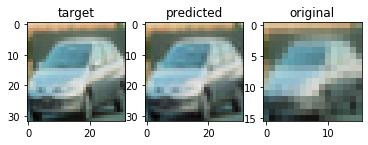

In [9]:
# demonstrate how the model works on unseen data
pred = model.predict(X[49990:,:,:,:])
f = plt.figure()
a1 = f.add_subplot(1,3,1)
a1.set_title('target')
plt.imshow(Y[49993])
a2 = f.add_subplot(1,3,2)
a2.set_title('predicted')
plt.imshow(pred[3])
a3 = f.add_subplot(1,3,3)
a3.set_title('original')
plt.imshow(cv2.resize(X[49993], (16,16)))

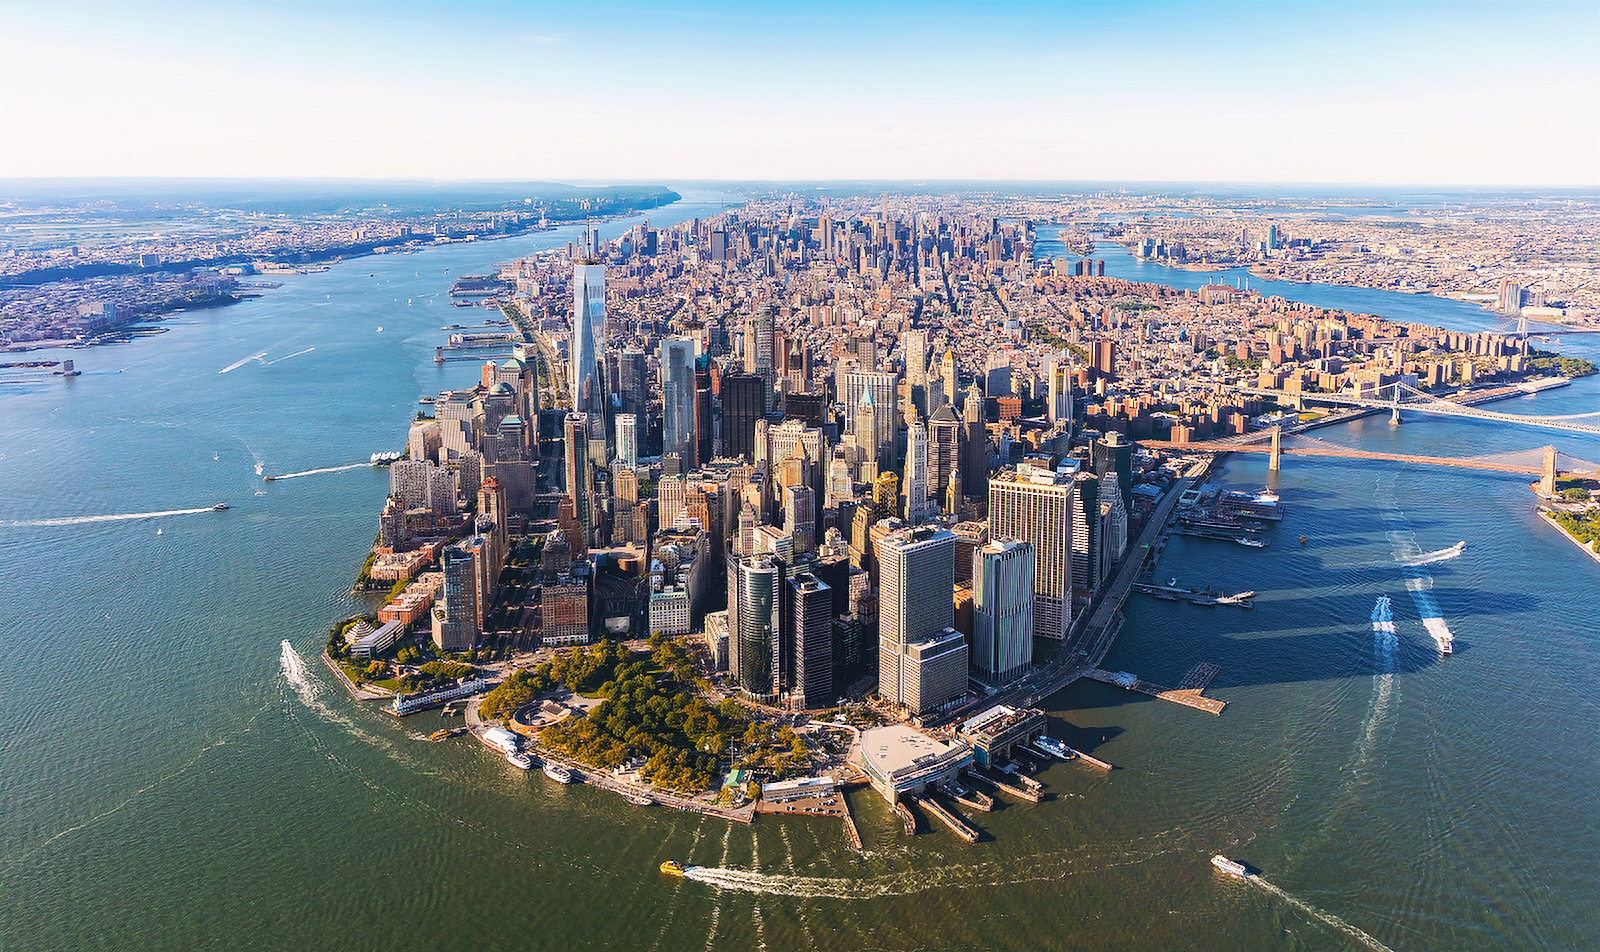

In [10]:
# here you can try to improve quality your own image, just replace the url with yours
from PIL import Image
import requests
from io import BytesIO
from google.colab.patches import cv2_imshow
url = 'https://wp.zillowstatic.com/streeteasy/2/shutterstock_695847865-bcd2e5.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img = np.array(img)
img = prepare(img)
# to match the dimensions of neural net
img = np.expand_dims(img,0)
pred = model.predict(img)

img = np.array(pred[0])*255
# model outputs images with BGR channels so we convert our image to RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img_RGB)


